In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

#for vizualisation purposes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
import laspy
inFile = laspy.file.File('pointcloud.las', mode='r')

In [3]:
inFile.points

array([((626539, 858531,  -466,  447, 17,   0, 2, 6, -4500, 112, 2.70106747e+08, 48128, 47616, 44544, 4., -10.26000023,  4.46999979),),
       ((626500, 857813,  -472,  474, 34,   0, 2, 6, -4500, 112, 2.70106747e+08, 49408, 49408, 46336, 8., -10.        ,  4.73999977),),
       ((626633, 858063,  -407,  458, 17,   0, 2, 6, -4500, 112, 2.70106747e+08, 49664, 49664, 46592, 4., -10.13000011,  4.57999992),),
       ...,
       ((626063, 736938,  -973,  822, 17, 192, 1, 7, -4833, 113, 2.70107390e+08, 17408, 19200, 17152, 6.,  -5.76000023,  8.22000027),),
       ((625938, 737156, -1120, 1025, 17,  64, 2, 7, -4833, 113, 2.70107390e+08, 17152, 18432, 16896, 2.,  -3.73000002, 10.25      ),),
       ((625914, 736750, -1097, 1032, 17, 192, 2, 7, -4833, 113, 2.70107390e+08, 15104, 16384, 14848, 9.,  -3.6500001 , 10.31999969),)],
      dtype=[('point', [('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('flag_byte', 'u1'), ('classification_flags', 'u1'), ('classification_byte', 'u1'),

In [4]:
classification = inFile.classification

In [5]:
classification

array([2, 2, 2, ..., 1, 2, 2], dtype=uint8)

In [6]:
classification = classification.transpose()

In [7]:
points = np.vstack((inFile.X,inFile.Y,inFile.Z)).transpose()


In [8]:
points

array([[626539, 858531,   -466],
       [626500, 857813,   -472],
       [626633, 858063,   -407],
       ...,
       [626063, 736938,   -973],
       [625938, 737156,  -1120],
       [625914, 736750,  -1097]])

In [9]:
colors = np.vstack((inFile.Red,inFile.Blue,inFile.Green)).transpose()

In [10]:
colors 


array([[48128, 44544, 47616],
       [49408, 46336, 49408],
       [49664, 46592, 49664],
       ...,
       [17408, 17152, 19200],
       [17152, 16896, 18432],
       [15104, 14848, 16384]], dtype=uint16)

In [11]:
colors = colors/65535
colors

array([[0.73438621, 0.67969787, 0.72657359],
       [0.75391775, 0.70704204, 0.75391775],
       [0.75782406, 0.71094835, 0.75782406],
       ...,
       [0.26562905, 0.26172274, 0.29297322],
       [0.26172274, 0.25781643, 0.28125429],
       [0.23047227, 0.22656596, 0.25000381]])

In [12]:
dataset = pd.DataFrame(points,columns=['X','Y','Z'])

In [13]:
dataset

,X,Y,Z
0,626539,858531,-466
1,626500,857813,-472
2,626633,858063,-407
3,626773,858344,-436
4,626500,857219,-407
...,...,...,...
3402221,626117,737469,-910
3402222,625992,737656,-1083
3402223,626063,736938,-973
3402224,625938,737156,-1120


In [14]:
dataset['R'] = colors[:,0]
dataset['G'] = colors[:,1]
dataset['B'] = colors[:,2]
dataset['Classification'] = inFile.classification

In [15]:

dataset

,X,Y,Z,R,G,B,Classification
0,626539,858531,-466,0.734386,0.679698,0.726574,2
1,626500,857813,-472,0.753918,0.707042,0.753918,2
2,626633,858063,-407,0.757824,0.710948,0.757824,2
3,626773,858344,-436,0.738293,0.691417,0.738293,2
4,626500,857219,-407,0.617197,0.574228,0.625010,2
...,...,...,...,...,...,...,...
3402221,626117,737469,-910,0.218753,0.214847,0.246098,1
3402222,625992,737656,-1083,0.265629,0.261723,0.285161,2
3402223,626063,736938,-973,0.265629,0.261723,0.292973,1
3402224,625938,737156,-1120,0.261723,0.257816,0.281254,2


In [16]:
dataset.Classification.unique()

array([ 2,  1,  6,  9, 26], dtype=uint8)

In [17]:
dataset['Classification'] = dataset['Classification'].replace([2,1,6,9,26],[0,1,2,3,4])
dataset.Classification.unique()

array([0, 1, 2, 3, 4], dtype=uint8)

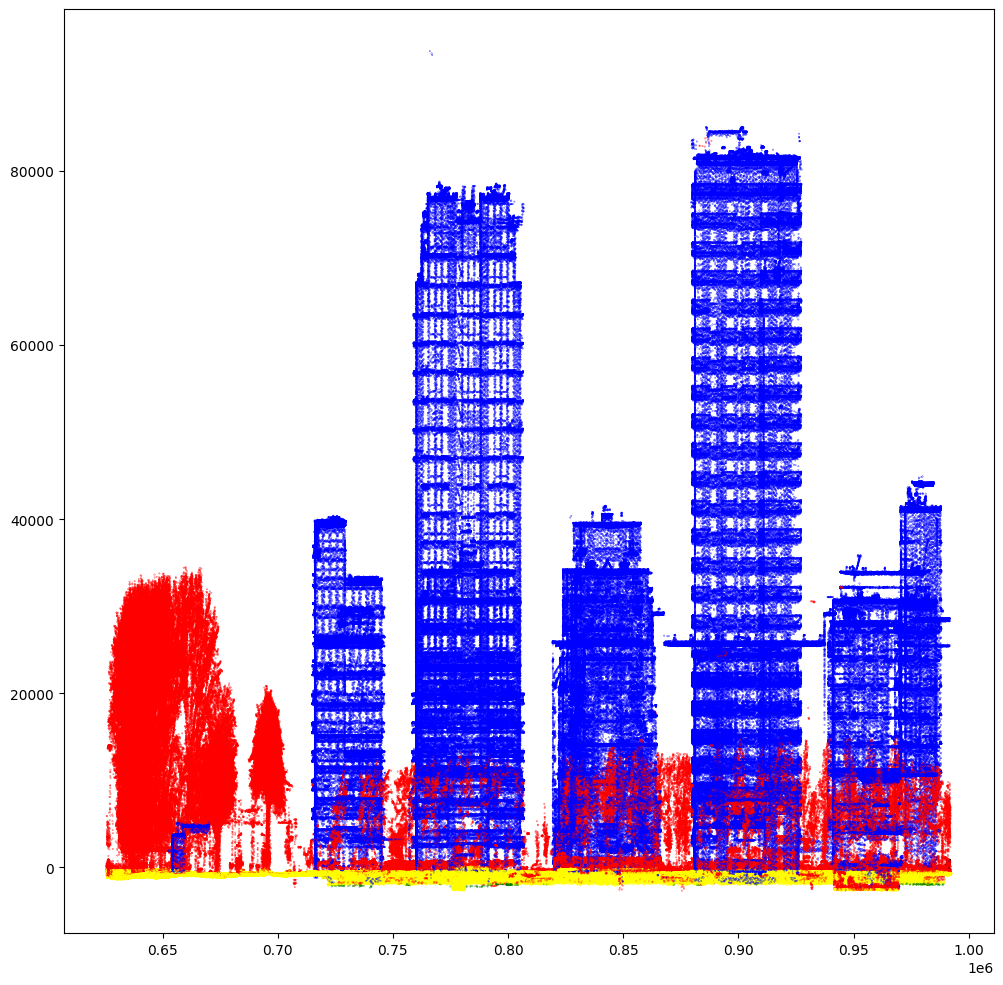

In [18]:
colors = {0:'yellow',1:'red',2:'blue',3:'green',4:'black'}
plt.figure(figsize=(12,12))
plt.scatter(dataset['X'],dataset['Z'],c=dataset['Classification'].map(colors),s=0.05)
plt.show()

CPU times: total: 3.8 s
Wall time: 4.66 s


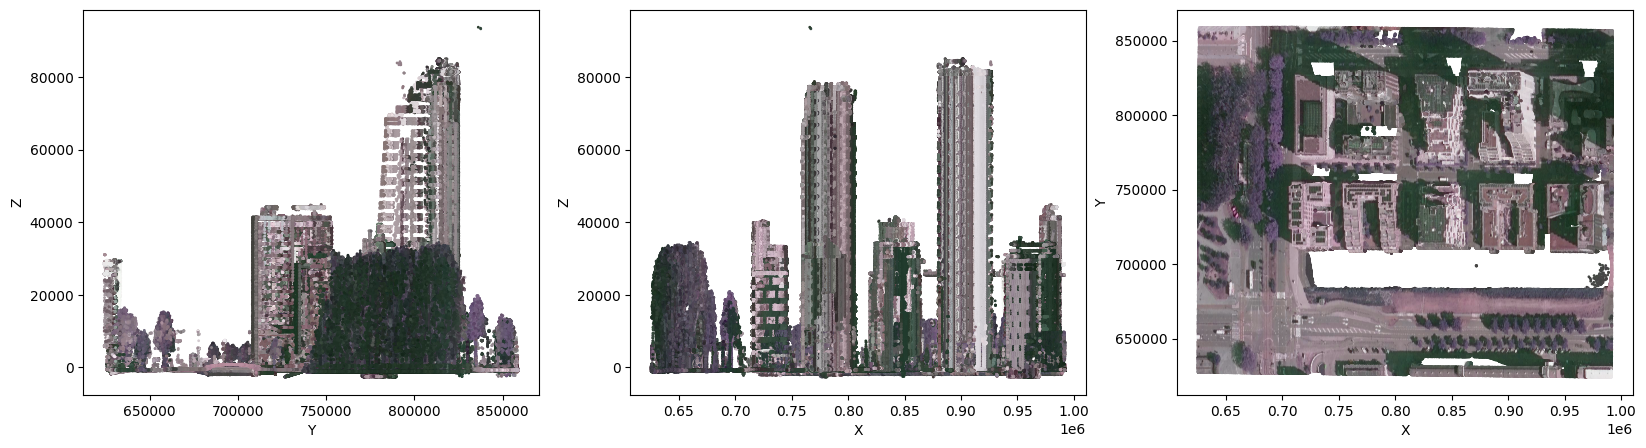

In [19]:
%%time
fig, m_axs = plt.subplots(1, 3, figsize = (20, 5))
ax_names = 'XYZ'
for i, c_ax in enumerate(m_axs.flatten()):
    plot_axes = [x for j, x in enumerate(ax_names) if j!=i]
    c_ax.scatter(dataset[plot_axes[0]],
                dataset[plot_axes[1]],
                c=dataset[['R', 'G', 'B']].values,
                 s=1
                )
    c_ax.set_xlabel(plot_axes[0])
    c_ax.set_ylabel(plot_axes[1])

In [20]:
label_names = {0: 'ground',
               1: 'high-vegitation',
               2: 'buildings',
               3: 'Unknown1',
              4: 'Unknown2'}

CPU times: total: 4.06 s
Wall time: 4.15 s


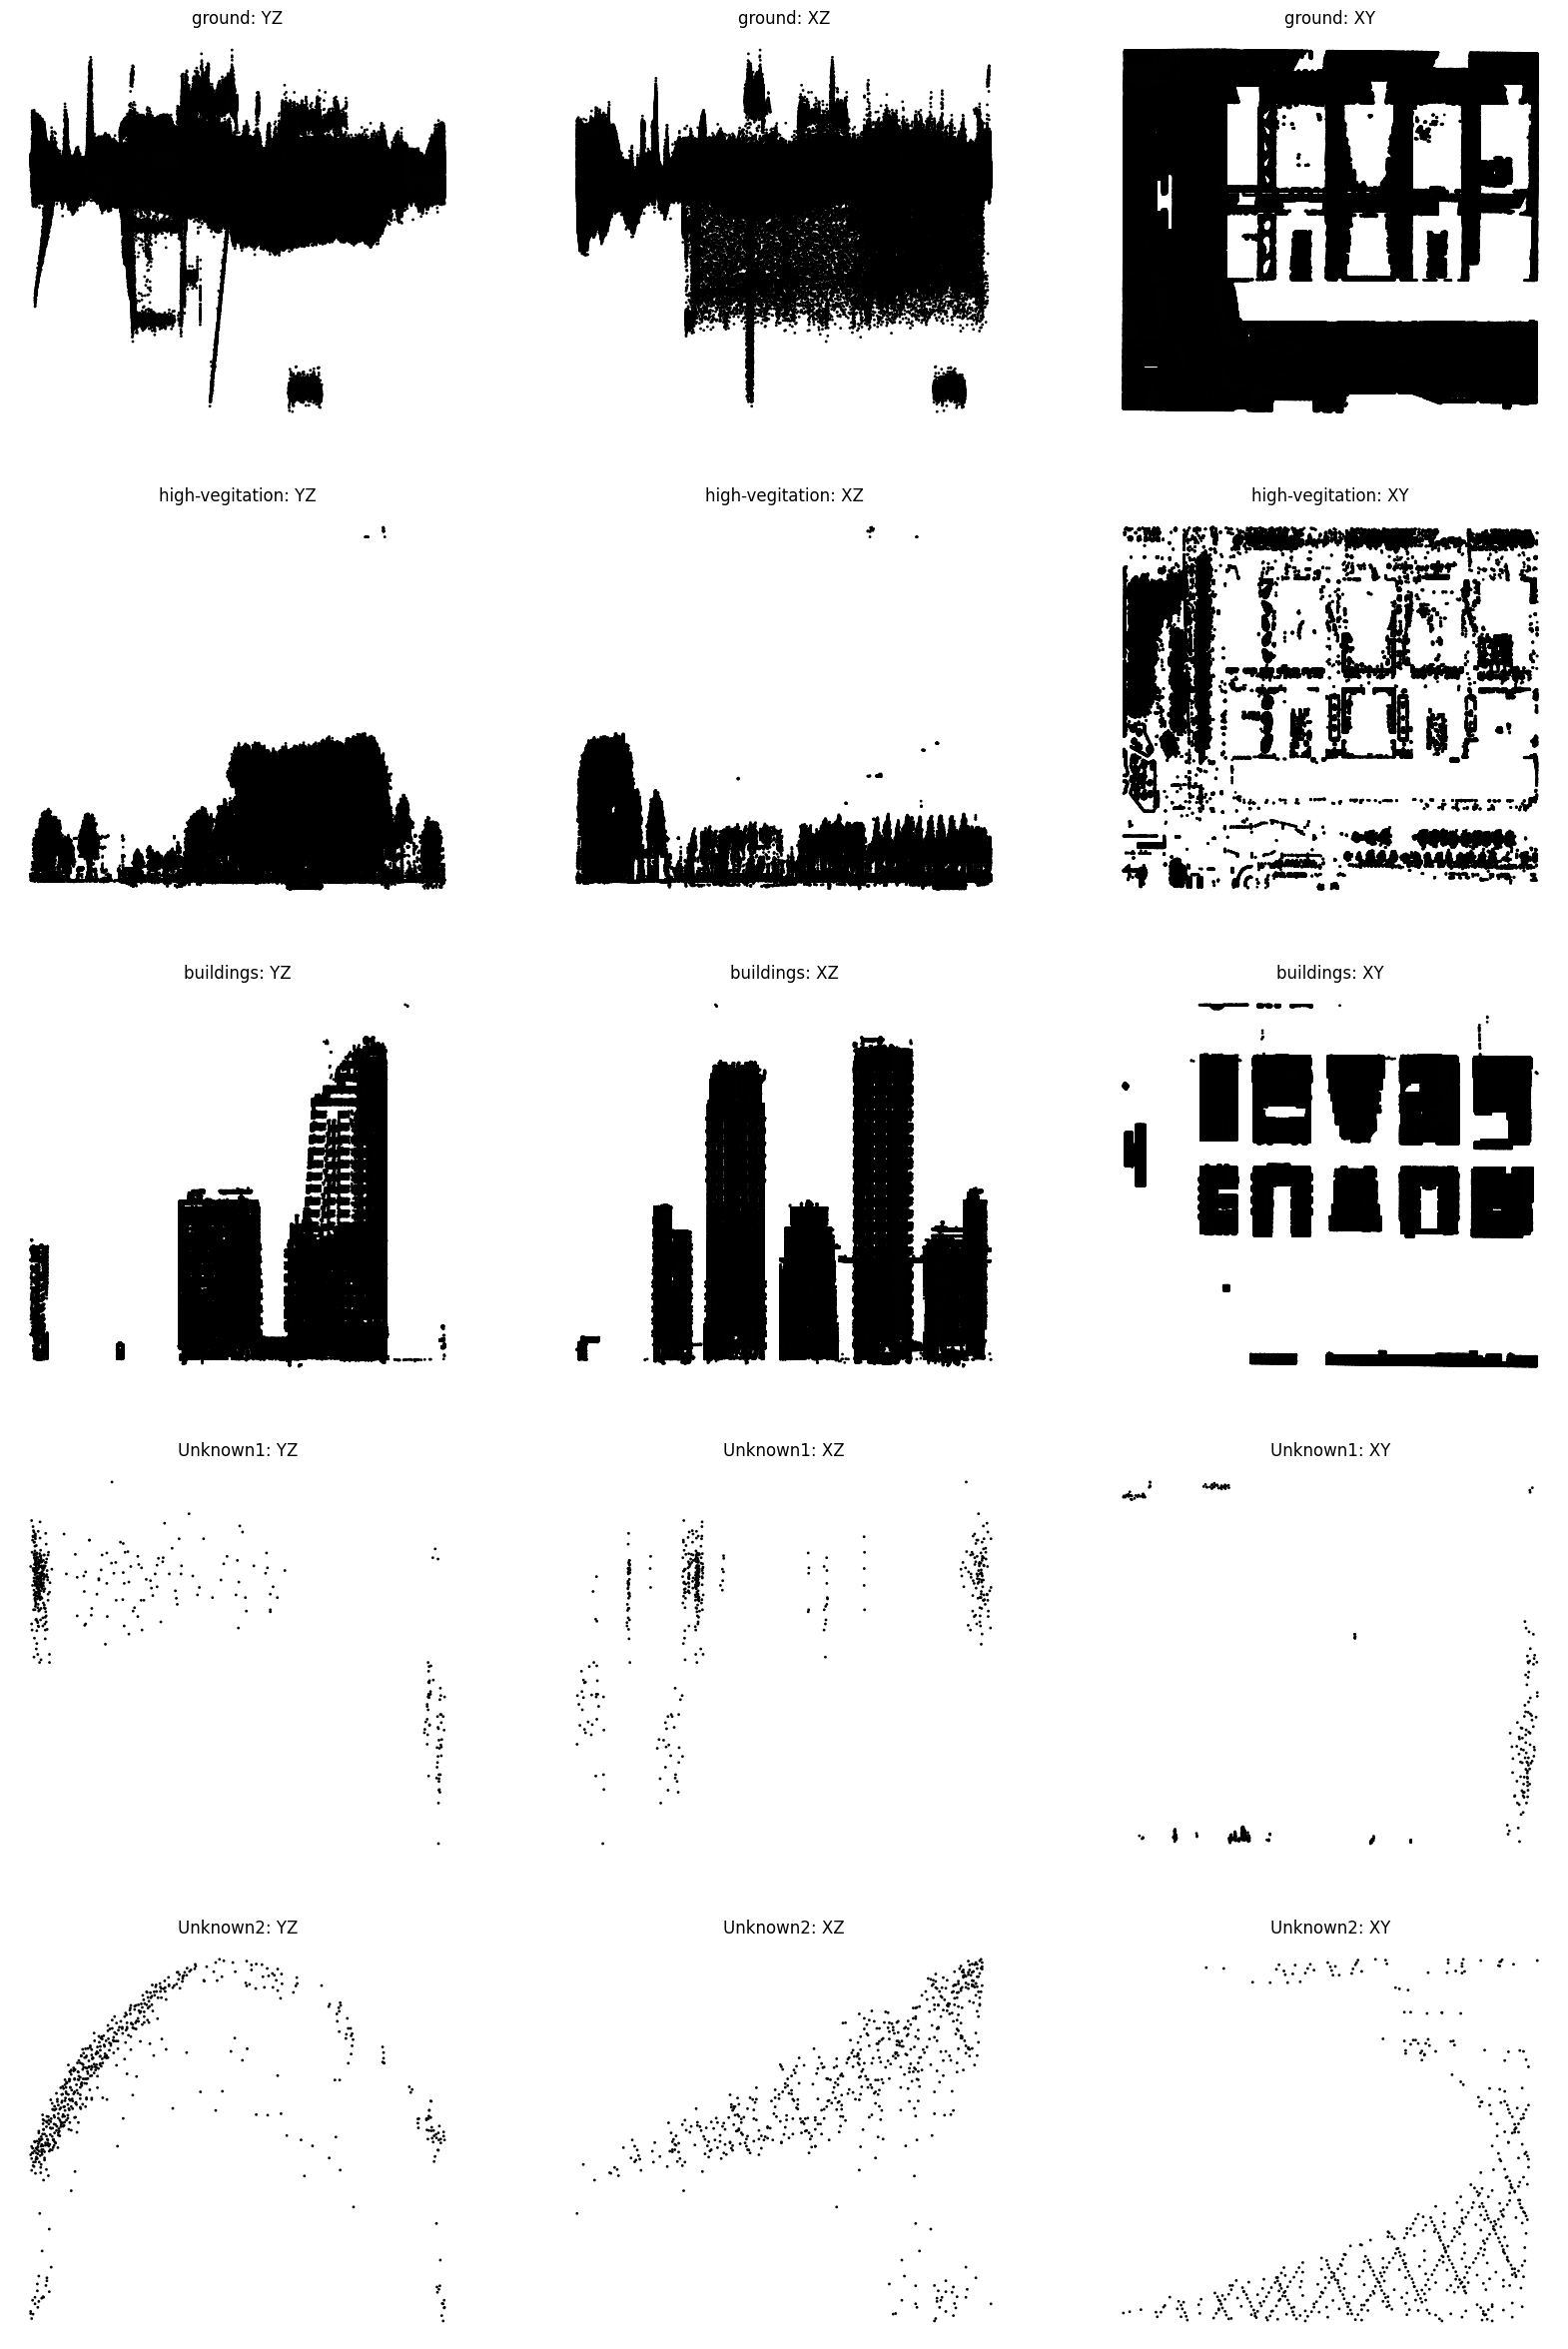

In [21]:
%%time
# fig, m_axs = plt.subplots(1, 3, figsize = (20, 5))
ax_names = 'XYZ'

max_keys = max(label_names.keys())
fig, m_axs = plt.subplots(max_keys + 1, 3, figsize = (20, 30))
for i, c_axs in enumerate(m_axs.T):
    plot_axes = [x for j, x in enumerate(ax_names) if j != i]
    for c_ax, (c_key, c_value) in zip(c_axs, label_names.items()):
        c_df = dataset[dataset['Classification'] == c_key]
        # print(c_df)
        c_ax.scatter(c_df[plot_axes[0]].values,
                  c_df[plot_axes[1]].values,
                  # '.',
                  c=c_df[["R", "G", "B"]].values / 255,
                  label = c_value,
                  s=1
                 )
        c_ax.set_title('{}: {}'.format(c_value, ''.join(plot_axes)))
        c_ax.set_xlabel(plot_axes[0])
        c_ax.set_ylabel(plot_axes[1])
        c_ax.axis('off')

In [22]:
#Create training and testing
labels = dataset['Classification']
features = dataset[['X','Y','Z','R','G','B']]
features_scaled = MinMaxScaler().fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4)

In [1]:
#this will take a lot of time
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False))),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# No, scaling is not necessary for random forests. The nature of RF is such that convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important
rf_classifier = RandomForestClassifier(n_estimators = 10)

#The line below is useful only if you want to create a classification model
rf_classifier.fit(X_train, y_train)

#The line below is useful only if you want to test on an unseen dataset (real scenario)
rf_predictions = rf_classifier.predict(X_test)

print(classification_report(y_test, rf_predictions))

In [ ]:
# plotting the results 3D
ax = plt.axes(projection='3d')
ax.scatter(X_test['X'], X_test['Y'], X_test['Z'], c = rf_predictions, s=0.1)
plt.show()# plotting the results 3D
ax = plt.axes(projection='3d')
ax.scatter(X_test['X'], X_test['Y'], X_test['Z'], c = rf_predictions, s=0.1)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = rf_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-rf_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-rf_predictions))
axs[2].set_title('Differences')

In [ ]:
#Example of a K-Nearest Neighbors Model for 3D Point Cloud Semantic Segmentation
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(classification_report(y_test, knn_predictions, target_names=['ground','high-vegetation','buildings','Unknown1','Unknown2']))

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = knn_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-knn_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-knn_predictions))
axs[2].set_title('Differences')

In [ ]:
#Example of a Multi-Layer Perception Model for 3D Point Cloud Semantic Segmentation
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, 2), random_state=1)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
print(classification_report(y_test, mlp_predictions, target_names=['ground','high-vegetation','buildings','Unknown1','Unknown2']))

fig, axs = plt.subplots(1, 3, figsize=(20,5)) # row 1, col 2 index 1
# fig, ax = plt.subplots(nrows=1, ncols=2)
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = mlp_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-mlp_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-mlp_predictions))
axs[2].set_title('Differences')

In [ ]:
val_labels=dataset['Classification']
val_features=dataset[['X','Y','Z','R','G','B']]
val_predictions = rf_classifier.predict(val_features)
print(classification_report(val_labels, val_predictions, target_names=['ground','high-vegetation','buildings','Unknown1','Unknown2']))

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5)) # row 1, col 2 index 1
# fig, ax = plt.subplots(nrows=1, ncols=2)
axs[0].scatter(val_features['X'], val_features['Y'], c =val_labels, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(val_features['X'], val_features['Y'], c = val_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(val_features['X'], val_features['Y'], c = val_labels-val_predictions, cmap = plt.cm.rainbow, s=0.5*(val_labels-val_predictions))
axs[2].set_title('Differences')